# London Housing — Data Wrangling Mini Project

**Goal:** Clean, standardize, and merge monthly and yearly London housing datasets into a single, analysis-ready dataset.

**Datasets:**
- `/mnt/data/housing_in_london_monthly_variables.csv`
- `/mnt/data/housing_in_london_yearly_variables.csv`

**Deliverables:**
- Cleaned CSV: `london_housing_cleaned.csv`
- This notebook with step-by-step transformations and before/after samples


In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

pd.set_option('display.max_columns', None)
DATA_DIR = Path('.')
MONTHLY_PATH = 'housing_in_london_monthly_variables.csv'
YEARLY_PATH = 'housing_in_london_yearly_variables.csv'

## 2) Load and Inspect Data

In [2]:
monthly = pd.read_csv(MONTHLY_PATH)
yearly = pd.read_csv(YEARLY_PATH)

print("Monthly shape:", monthly.shape)
print("Yearly shape:", yearly.shape)

display(monthly.head(3))
display(yearly.head(3))

print("\nMonthly .info():")
monthly.info()
print("\nYearly .info():")
yearly.info()

Monthly shape: (13549, 7)
Yearly shape: (1071, 12)


,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1


,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1



Monthly .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB

Yearly .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1071 non-null   object 
 1   area               1071 non-null   object 
 2   date               1071 non-null   object 
 3   median_salary      1049 non-null   float64
 4

### 2a) Snapshot of Raw Data (Before Cleaning)
We keep copies of the **raw** monthly and yearly DataFrames for comparison and documentation.


In [3]:
monthly_raw = monthly.copy()
yearly_raw = yearly.copy()

display(monthly_raw.sample(5, random_state=10))
display(yearly_raw.sample(5, random_state=10))

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
2922,2012-07-01,enfield,247630,E09000010,225.0,1853.0,1
8600,2008-11-01,sutton,226015,E09000029,147.0,1117.0,1
6091,2000-06-01,kingston upon thames,164611,E09000021,327.0,NaN,1
463,2008-07-01,barking and dagenham,191067,E09000002,110.0,1790.0,1
12244,2011-08-01,east of england,192616,E12000006,8177.0,NaN,0


,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
647,E12000003,yorkshire and the humber,2011-12-01,24119.0,7.39,28172,42,5288212.0,2513000.0,NaN,NaN,0
326,E09000021,kingston upon thames,2005-12-01,24937.0,NaN,32985,24,152489.0,82000.0,3726.0,63918.0,1
64,E09000014,haringey,2000-12-01,19772.0,NaN,#,5,219845.0,74000.0,NaN,NaN,1
399,E13000001,inner london,2006-12-01,33333.0,NaN,51556,NaN,2989670.0,NaN,32796.0,1325356.0,0
654,E13000001,inner london,2011-12-01,37851.0,NaN,58760,NaN,3241102.0,NaN,32796.0,1410639.0,0


## 3) Standardize Column Names

In [4]:
def to_snake(s: str) -> str:
    return s.strip().lower().replace(' ', '_')

monthly.columns = [to_snake(c) for c in monthly.columns]
yearly.columns  = [to_snake(c) for c in yearly.columns]

monthly.head(1), yearly.head(1)

(         date            area  average_price       code  houses_sold  \
 0  1995-01-01  city of london          91449  E09000001         17.0   
 
    no_of_crimes  borough_flag  
 0           NaN             1  ,
         code            area        date  median_salary  life_satisfaction  \
 0  E09000001  city of london  1999-12-01        33020.0                NaN   
 
   mean_salary recycling_pct  population_size  number_of_jobs  area_size  \
 0       48922             0           6581.0             NaN        NaN   
 
    no_of_houses  borough_flag  
 0           NaN             1  )

## 4) Fix Data Types

In [5]:
monthly['date'] = pd.to_datetime(monthly['date'], errors='coerce')
yearly['date']  = pd.to_datetime(yearly['date'], errors='coerce')

numeric_like_cols_yearly = ['median_salary','mean_salary','life_satisfaction','recycling_pct',
                            'population_size','number_of_jobs','area_size','no_of_houses']

for col in numeric_like_cols_yearly:
    if col in yearly.columns:
        yearly[col] = pd.to_numeric(yearly[col], errors='coerce')

monthly.dtypes, yearly.dtypes

(date             datetime64[ns]
 area                     object
 average_price             int64
 code                     object
 houses_sold             float64
 no_of_crimes            float64
 borough_flag              int64
 dtype: object,
 code                         object
 area                         object
 date                 datetime64[ns]
 median_salary               float64
 life_satisfaction           float64
 mean_salary                 float64
 recycling_pct               float64
 population_size             float64
 number_of_jobs              float64
 area_size                   float64
 no_of_houses                float64
 borough_flag                  int64
 dtype: object)

## 5) Clean Categorical Data

In [6]:
for df in [monthly, yearly]:
    if 'area' in df.columns:
        df['area'] = df['area'].astype(str).str.strip().str.title()

monthly['area'].head(10).to_frame().T

,0,1,2,3,4,5,6,7,8,9
area,City Of London,City Of London,City Of London,City Of London,City Of London,City Of London,City Of London,City Of London,City Of London,City Of London


## 6) Missing Value Summary

In [7]:
def missing_summary(df: pd.DataFrame) -> pd.DataFrame:
    total = df.isna().sum()
    pct = 100 * total / len(df)
    return pd.DataFrame({'missing_count': total, 'missing_pct': pct.round(2)}).sort_values('missing_pct', ascending=False)

ms_monthly = missing_summary(monthly)
ms_yearly = missing_summary(yearly)

ms_monthly.head(10), ms_yearly.head(10)

(               missing_count  missing_pct
 no_of_crimes            6110        45.10
 houses_sold               94         0.69
 date                       0         0.00
 average_price              0         0.00
 area                       0         0.00
 code                       0         0.00
 borough_flag               0         0.00,
                    missing_count  missing_pct
 life_satisfaction            719        67.13
 area_size                    405        37.82
 no_of_houses                 405        37.82
 recycling_pct                212        19.79
 number_of_jobs               140        13.07
 population_size               53         4.95
 median_salary                 22         2.05
 mean_salary                   17         1.59
 date                           0         0.00
 area                           0         0.00)

### 6a) Visualize Missingness — Before Cleaning
Quick heatmaps of missing values for the raw datasets. Each column is a feature; dark cells indicate missing values.


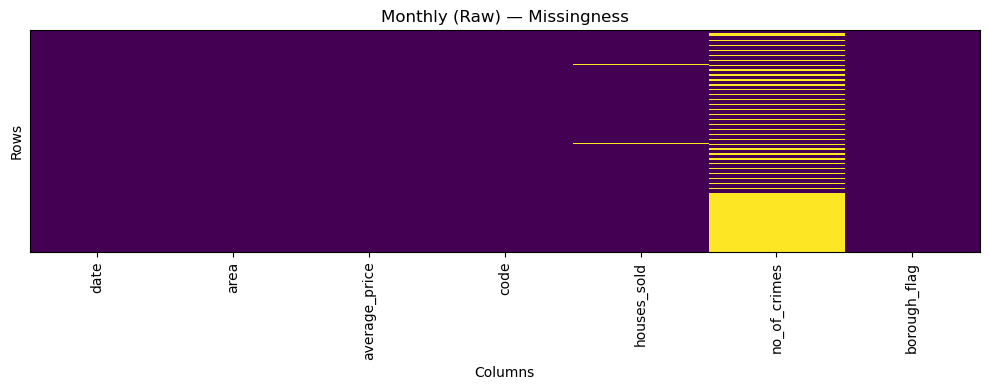

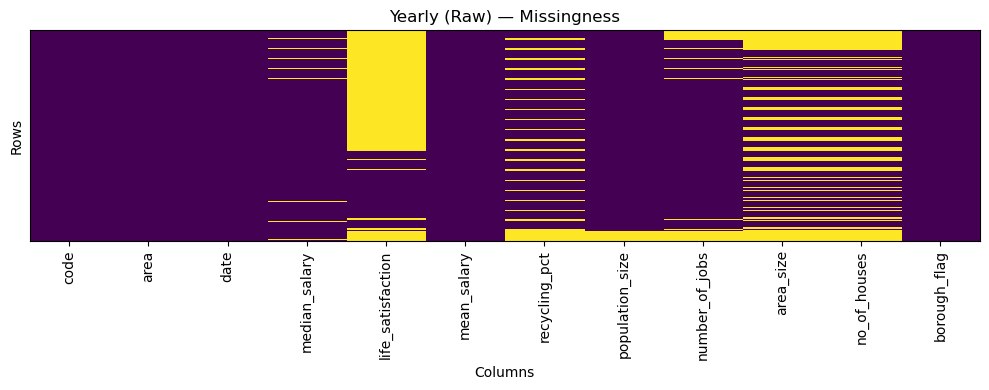

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_missingness(df, title):
    mask = df.isna().values
    plt.figure(figsize=(10, 4))
    plt.imshow(mask, aspect='auto', interpolation='nearest')
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.xticks(ticks=np.arange(df.shape[1]), labels=df.columns, rotation=90)
    plt.yticks([])
    plt.tight_layout()
    plt.show()

plot_missingness(monthly_raw, "Monthly (Raw) — Missingness")
plot_missingness(yearly_raw, "Yearly (Raw) — Missingness")

## 7) Outlier Detection (IQR) — Flag Only (Non-Destructive)

In [8]:
def flag_outliers_iqr(df, cols):
    flagged = pd.DataFrame(index=df.index)
    for c in cols:
        if c in df.columns:
            series = pd.to_numeric(df[c], errors='coerce')
            q1, q3 = series.quantile(0.25), series.quantile(0.75)
            iqr = q3 - q1
            low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
            flagged[f'{c}_is_outlier'] = (series < low) | (series > high)
    return flagged

monthly_outliers = flag_outliers_iqr(monthly, ['average_price','houses_sold','no_of_crimes'])
yearly_outliers  = flag_outliers_iqr(yearly, ['median_salary','mean_salary','population_size','number_of_jobs','area_size','no_of_houses'])

monthly_outliers.sum(), yearly_outliers.sum()

(average_price_is_outlier     565
 houses_sold_is_outlier      1948
 no_of_crimes_is_outlier      354
 dtype: int64,
 median_salary_is_outlier      33
 mean_salary_is_outlier        83
 population_size_is_outlier    80
 number_of_jobs_is_outlier     81
 area_size_is_outlier          72
 no_of_houses_is_outlier       90
 dtype: int64)

## 8) Handle Missing Values (Example Strategies)

In [9]:

monthly_clean = monthly.copy()
if 'houses_sold' in monthly_clean.columns:
    monthly_clean['houses_sold'] = monthly_clean.groupby('area')['houses_sold'].transform(lambda s: s.fillna(s.median()))
    monthly_clean['houses_sold'] = monthly_clean['houses_sold'].fillna(monthly_clean['houses_sold'].median())

yearly_clean = yearly.copy()
cols_to_fill_area_median = ['median_salary','mean_salary','recycling_pct','population_size','number_of_jobs','area_size','no_of_houses']
for col in cols_to_fill_area_median:
    if col in yearly_clean.columns:
        yearly_clean[col] = yearly_clean.groupby('area')[col].transform(lambda s: s.fillna(s.median()))
        yearly_clean[col] = yearly_clean[col].fillna(yearly_clean[col].median())

display(monthly[['area','date','houses_sold','no_of_crimes']].sample(5, random_state=7))
display(monthly_clean[['area','date','houses_sold','no_of_crimes']].sample(5, random_state=7))
display(yearly[['area','date','mean_salary','recycling_pct','population_size']].sample(5, random_state=7))
display(yearly_clean[['area','date','mean_salary','recycling_pct','population_size']].sample(5, random_state=7))

,area,date,houses_sold,no_of_crimes
10754,North East,2012-11-01,2502.0,NaN
2301,Croydon,2011-03-01,269.0,2772.0
10009,Inner London,2000-12-01,4860.0,NaN
12151,East Of England,2003-11-01,13108.0,NaN
1822,Camden,1996-05-01,287.0,NaN


,area,date,houses_sold,no_of_crimes
10754,North East,2012-11-01,2502.0,NaN
2301,Croydon,2011-03-01,269.0,2772.0
10009,Inner London,2000-12-01,4860.0,NaN
12151,East Of England,2003-11-01,13108.0,NaN
1822,Camden,1996-05-01,287.0,NaN


,area,date,mean_salary,recycling_pct,population_size
244,South East,2003-12-01,27576.0,23.0,8087924.0
1010,South West,2018-12-01,32848.0,50.0,5599735.0
668,Bromley,2012-12-01,33859.0,49.0,314036.0
34,North West,1999-12-01,19609.0,7.0,6773115.0
775,Greenwich,2014-12-01,31690.0,34.0,268678.0


,area,date,mean_salary,recycling_pct,population_size
244,South East,2003-12-01,27576.0,23.0,8087924.0
1010,South West,2018-12-01,32848.0,50.0,5599735.0
668,Bromley,2012-12-01,33859.0,49.0,314036.0
34,North West,1999-12-01,19609.0,7.0,6773115.0
775,Greenwich,2014-12-01,31690.0,34.0,268678.0


### 8a) Snapshot of Cleaned Data (After Cleaning)
Compare with the earlier raw samples to see the effects of imputation and type standardization.


In [10]:
display(monthly_clean.sample(5, random_state=10))
display(yearly_clean.sample(5, random_state=10))

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
2922,2012-07-01,Enfield,247630,E09000010,225.0,1853.0,1
8600,2008-11-01,Sutton,226015,E09000029,147.0,1117.0,1
6091,2000-06-01,Kingston Upon Thames,164611,E09000021,327.0,NaN,1
463,2008-07-01,Barking And Dagenham,191067,E09000002,110.0,1790.0,1
12244,2011-08-01,East Of England,192616,E12000006,8177.0,NaN,0


,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
647,E12000003,Yorkshire And The Humber,2011-12-01,24119.0,7.39,28172.0,42.0,5288212.0,2513000.0,4323.0,102317.0,0
326,E09000021,Kingston Upon Thames,2005-12-01,24937.0,NaN,32985.0,24.0,152489.0,82000.0,3726.0,63918.0,1
64,E09000014,Haringey,2000-12-01,19772.0,NaN,31260.0,5.0,219845.0,74000.0,2960.0,102862.0,1
399,E13000001,Inner London,2006-12-01,33333.0,NaN,51556.0,27.0,2989670.0,155000.0,32796.0,1325356.0,0
654,E13000001,Inner London,2011-12-01,37851.0,NaN,58760.0,27.0,3241102.0,155000.0,32796.0,1410639.0,0


### 8b) Visualize Missingness — After Cleaning
Heatmaps after the imputation step to demonstrate data quality improvement.


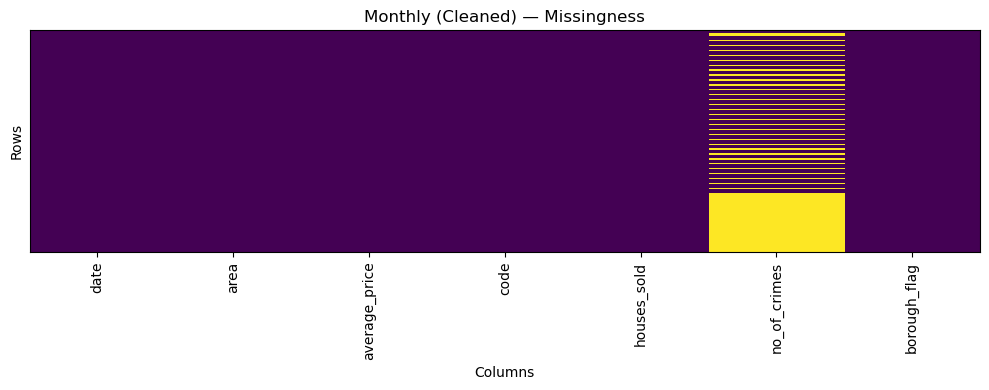

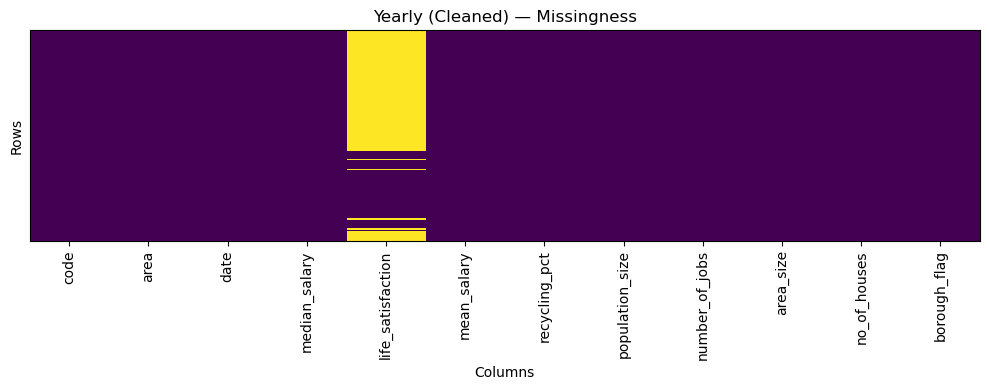

In [13]:
plot_missingness(monthly_clean, "Monthly (Cleaned) — Missingness")
plot_missingness(yearly_clean, "Yearly (Cleaned) — Missingness")

## 9) Merge Monthly & Yearly Data

In [14]:
monthly_clean['year'] = monthly_clean['date'].dt.year
monthly_clean['month'] = monthly_clean['date'].dt.month

yearly_clean['year'] = yearly_clean['date'].dt.year

merge_cols = ['area','year']
to_add = [c for c in yearly_clean.columns if c not in merge_cols + ['date','code','borough_flag']]
merged = monthly_clean.merge(yearly_clean[merge_cols + to_add], on=merge_cols, how='left')

print("Merged shape:", merged.shape)
merged.head(3)

Merged shape: (13549, 17)


,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses
0,1995-01-01,City Of London,91449,E09000001,17.0,NaN,1,1995,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995-02-01,City Of London,82203,E09000001,7.0,NaN,1,1995,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1995-03-01,City Of London,79121,E09000001,14.0,NaN,1,1995,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 10) Add Derived Columns

In [15]:
if 'population_size' in merged.columns:
    merged['crime_rate_per_1k'] = (merged['no_of_crimes'] / merged['population_size']) * 1000
else:
    merged['crime_rate_per_1k'] = np.nan

if 'mean_salary' in merged.columns and 'average_price' in merged.columns:
    merged['price_to_mean_salary'] = merged['average_price'] / merged['mean_salary']

merged[['area','date','average_price','no_of_crimes','population_size','crime_rate_per_1k','price_to_mean_salary']].head(5)

,area,date,average_price,no_of_crimes,population_size,crime_rate_per_1k,price_to_mean_salary
0,City Of London,1995-01-01,91449,NaN,NaN,NaN,NaN
1,City Of London,1995-02-01,82203,NaN,NaN,NaN,NaN
2,City Of London,1995-03-01,79121,NaN,NaN,NaN,NaN
3,City Of London,1995-04-01,77101,NaN,NaN,NaN,NaN
4,City Of London,1995-05-01,84409,NaN,NaN,NaN,NaN


## 11) Final Checks & Save

In [16]:
before = len(merged)
merged = merged.drop_duplicates()
after = len(merged)
print(f"Dropped {before - after} duplicate rows. Final rows: {after}")

OUTPUT_PATH = Path('london_housing_cleaned.csv')
merged.to_csv(OUTPUT_PATH, index=False)
OUTPUT_PATH
print('Saved cleaned dataset to:', OUTPUT_PATH.resolve())

Dropped 0 duplicate rows. Final rows: 13549
Saved cleaned dataset to: /Users/garthlobello/Desktop/new project 2/london_housing_cleaned.csv


## 12) Notes & Decisions

- **Area standardization:** Converted to title case to align names across files.
- **Type coercion:** Converted `date` to datetime; coerced numeric-looking columns to numeric with `errors='coerce'`.
- **Missing values:** Conservatively imputed:
  - `houses_sold` via area median, then global median.
  - Left `no_of_crimes` as NaN due to sparsity (documented trade-off).
  - Yearly fields imputed via area median, then global median as fallback.
- **Outliers:** Only flagged using IQR; no capping/removal performed (non-destructive). You can add capping if needed.
- **Merge:** Joined yearly attributes to monthly granularity on `(area, year)`.
- **Derived features:** Added `crime_rate_per_1k` and `price_to_mean_salary` as examples.
